## Dataset Selection

Choose a classification dataset from the UCI Repository of Machine Learning Databases:
https://archive.ics.uci.edu/

Then you must load it with the pandas library, clean up and convert any data, as necessary.


In [16]:
import pandas as pd

data = pd.read_csv('titanic.csv') # Loading the Titanic Dataset and reading as DataFrame object
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [3]:
# Column Sex isn't valid because it contains strings, so lets split column sex into 2 columns Male and Female:
columnSex = pd.get_dummies(data.sex)

# For this work we need pclass, age, fare and male/female columns:
X = data.drop(['sex','name', 'sibsp', 'parch', "ticket","cabin", "embarked", "survived"], axis=1)

X = pd.concat([X,columnSex], axis=1)

#Lets check all rows for Na values and change all missing values to column's average value:
print("Before: ", X.columns[X.isna().any()])

X.age = X.age.fillna(X.age.mean()) #Fixing of Age column
X.fare = X.fare.fillna(X.fare.mean())  #Fixing of Fare column

print(" After: ", X.columns[X.isna().any()])

X.head(10) # Now X is ready input-values for classification models

Before:  Index(['age', 'fare'], dtype='object')
 After:  Index([], dtype='object')


,pclass,age,fare,female,male
0,1,29.00,211.3375,1,0
1,1,0.92,151.5500,0,1
2,1,2.00,151.5500,1,0
3,1,30.00,151.5500,0,1
4,1,25.00,151.5500,1,0
5,1,48.00,26.5500,0,1
6,1,63.00,77.9583,1,0
7,1,39.00,0.0000,0,1
8,1,53.00,51.4792,1,0
9,1,71.00,49.5042,0,1


In [4]:
y = data['survived'] #  y is target-values for classification models, just [1,0], where 1 is survived and 0 is not.
y.head(5)

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

# Train-Test values spliting:
# 20% of all data will be used for testing data and rest for training
# Random state is defined for the stability of the data used during the development of this assignment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Naive Bayes classifier

Classify the data with a NaïveBayes classifier: 
https://scikit-learn.org/stable/modules/naive_bayes.html

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

naive_bayes_classifier = GaussianNB()# creates an instance of the Gaussian Naive Bayes classifier model

naive_bayes_classifier.fit(X_train, y_train) # trains the classifier on the training data

y_pred = naive_bayes_classifier.predict(X_test) # making predictions on the testing set

accuracy = accuracy_score(y_test, y_pred) # Evaluation of model's accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8129770992366412


## Nearest neighbors classifier

Classify the data with a nearest neighbors classifier:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

You must find out the best number of nearest neighbors.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_classifier = KNeighborsClassifier() # creates an instance of the K-Nearest Neighbors classifier model

# Defining the parameter grid for grid search
# Testing values from 1 to 14 neighbors
# In order to decrease fit-ing time n of neighbors was decreased from 30 to 15, because result is 9, so that's enough
param_grid = {'n_neighbors': range(1, 15)}  

# In order to find the best parameter values we can use grid search algorithm
grid_search = GridSearchCV(knn_classifier, param_grid, cv=10) # with 10 cross-validation folds for knn model

grid_search.fit(X, y)

# After fiting from grid_search we obtain best number of neighbors and accuracy:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'n_neighbors': 9}
Best Accuracy: 0.6639283617146212


## Decision tree classifier

Classify the data with a decision tree classifier:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

You must find out the best hyperparameters and plot the best decision tree.

In [8]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

decision_tree_classifier = DecisionTreeClassifier() # create an instance of the Decision Tree classifier model

# Defining the parameter grid that will be used in GridSearch algoritm
param_grid = {
    'criterion': ['gini', 'entropy'], # dt algorithm uses either the Gini impurity or information gain to evaluate the quality of a split
    'max_depth': range(1, 11), # maximum depth of the decision tree
    'min_samples_split': range(2, 11), # minimum number of samples needed to split an internal node
    'min_samples_leaf': range(1, 11) # minimum number of samples needed to be at a leaf node
}

# Here we create a GridSearchCV object with 10 cross-validation folds for dt model
grid_search = GridSearchCV(decision_tree_classifier, param_grid, cv=10)
grid_search.fit(X, y)

# After fiting from grid_search we obtain the best number of neighbors and accuracy:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.7799706400469758


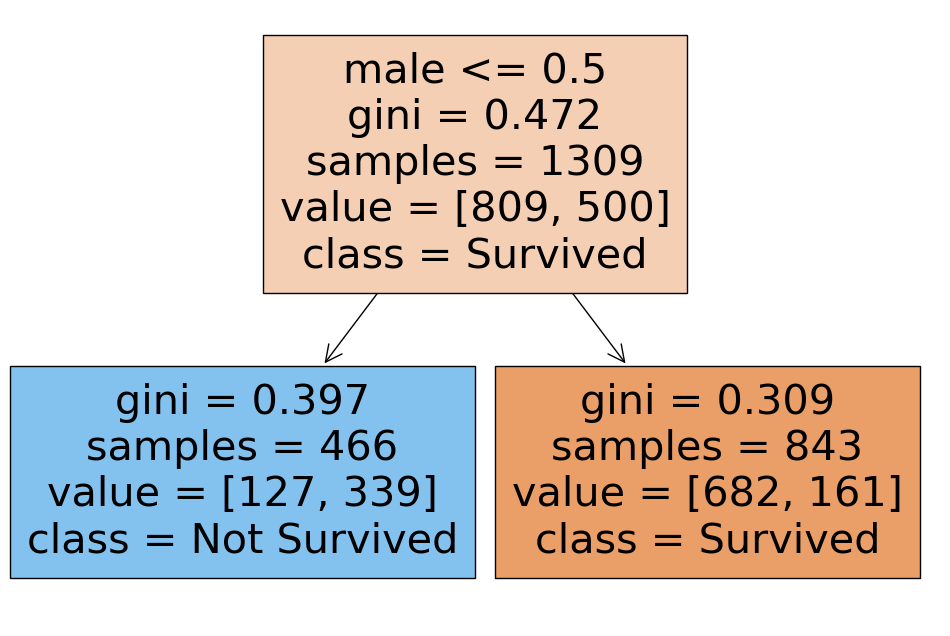

In [9]:
# Plot for best decision tree

best_decision_tree = grid_search.best_estimator_ # obtaing thr best values from grid search algrithm

plt.figure(figsize=(12, 8))
classes = ['Survived', 'Not Survived']
plot_tree(best_decision_tree, feature_names=X.columns, class_names=classes, filled=True)
plt.show()

As we can see from the plot above gini isn't equal to 0 and in each decision there are unsplited values -> so it's mean that in order to make more nodes we need more specific data which discribe better ability to Survive. 

## Support Vector Machine classifier

Classify the data with a Support Vector Machine classifier:

https://scikit‐learn.org/stable/modules/generated/sklearn.svm.SVC.html

You must find out the best kernel and hyperparameters.

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [11]:
# SVMs in scikit-learn do not always support probability estimation
# so we should set probability parameter as True:
svm_classifier = SVC(probability=True)

param_grid = {
    'C': [0.1, 1, 10, 100], # Smaller values specify stronger regularization of achieving a low training error and a low testing error
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # Specifies the kernel type to be used in the algorithm
    'gamma': ['scale', 'auto', 0.1, 1, 10] # defines how far the influence of a single training example reaches
}

grid_search = GridSearchCV(svm_classifier, param_grid, cv=10)

grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy: 0.6150384013819828


## Result Comparison 

Compare the performance of the previous classifiers. Report several classification performance measures.
Show the Receiver Operating Characteristic plots for the compared models:

https://scikit‐learn.org/stable/auto_examples/model_selection/plot_roc.html

All these tasks must be carried out using 10‐fold cross‐validation, so that the performance comparisons are carried out on the test sets:

https://scikit‐learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

Classification Report for Gaussian Naive Bayes:

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       156
           1       0.78      0.75      0.76       106

    accuracy                           0.81       262
   macro avg       0.81      0.80      0.80       262
weighted avg       0.81      0.81      0.81       262



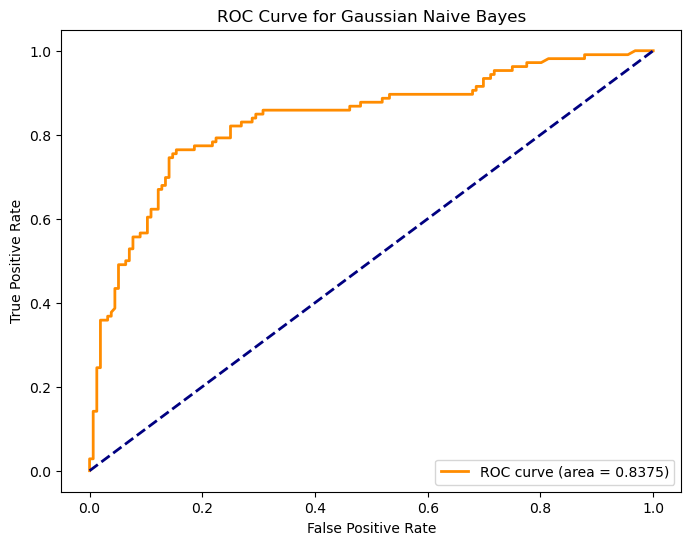

Classification Report for k-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       156
           1       0.66      0.61      0.63       106

    accuracy                           0.71       262
   macro avg       0.70      0.70      0.70       262
weighted avg       0.71      0.71      0.71       262



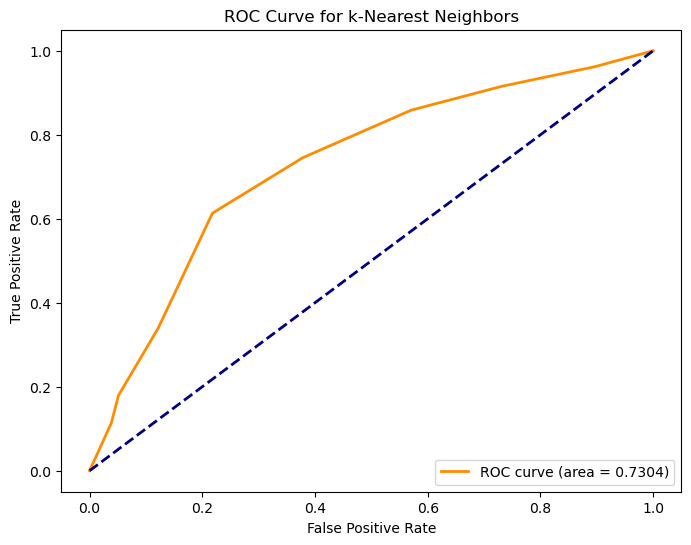

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       156
           1       0.80      0.72      0.76       106

    accuracy                           0.81       262
   macro avg       0.81      0.80      0.80       262
weighted avg       0.81      0.81      0.81       262



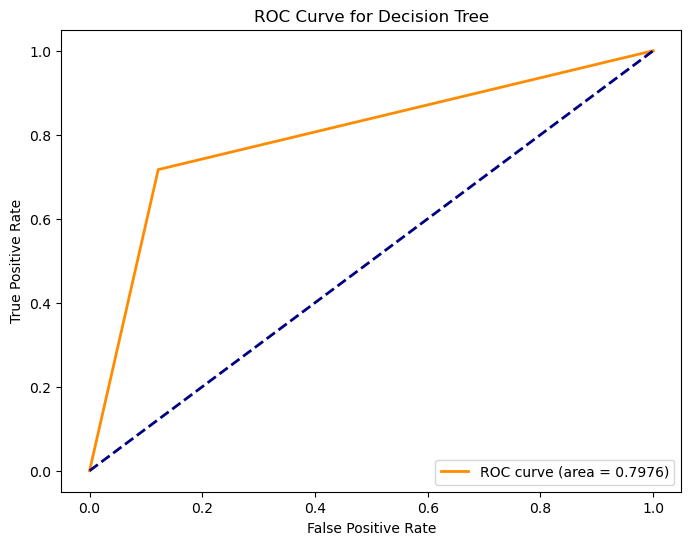

Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       156
           1       0.80      0.72      0.76       106

    accuracy                           0.81       262
   macro avg       0.81      0.80      0.80       262
weighted avg       0.81      0.81      0.81       262



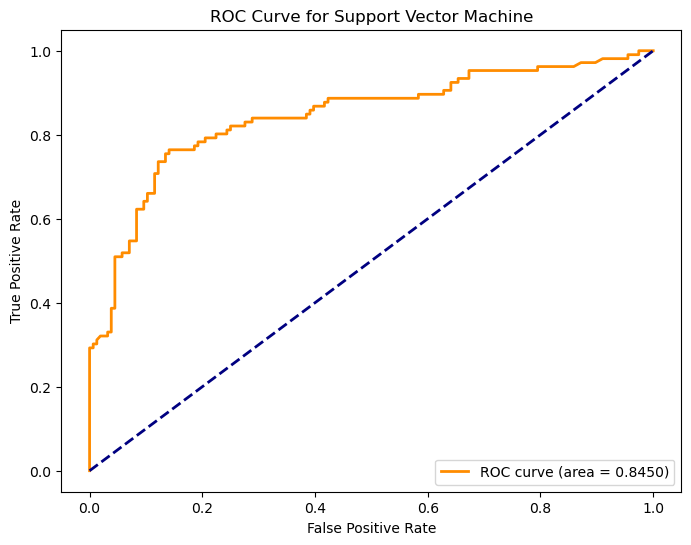

In [12]:
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


# List of classifiers WITH BEST PARAMETERS, what was obtained earlier and their names (labels for plots)
classifiers = [
    ("Gaussian Naive Bayes", GaussianNB()),
    ("k-Nearest Neighbors", KNeighborsClassifier(9)),
    ("Decision Tree", DecisionTreeClassifier(criterion='gini', max_depth=1, min_samples_leaf=1, min_samples_split=2)),
    ("Support Vector Machine", SVC(C=1, kernel='linear', gamma='scale', probability=True))
]



for name, classifier in classifiers:

    classifier.fit(X_train, y_train) # We train all models in order to obtain data for plots and reports
    
    y_pred = classifier.predict(X_test)
    
    print(f"Classification Report for {name}:\n") # Making the report, 
    print(classification_report(y_test, y_pred))  # which include: presicion, recall, f1-score and num of supported samples
    
    fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1]) # obtaing data for building Receiver Operating Charact. curve
    roc_auc = auc(fpr, tpr) # calculating of area under curve
    

    plt.figure(figsize=(8, 6))
    
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})') # adding roc curve to the plot
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # adding linear line to the plot
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()

    Above we could see the graphs and reports for each model


#### Gaussian Naive Bayes (NB):

**Precision and Recall**: The classifier demonstrates balanced precision and recall for both training (0 and 1) and suggests that it is equally good in identifying both survivors and non-survivors.

**F1-Score**: The F1-score, which balances precision is reasonable for both training, indicating an great trade-off between precision and recall.

**Accuracy**: The overall accuracy of 81% is relatively high, meaning that the model performs good on the given dataset.

#### K-Nearest Neighbors (KNN):

**Precision and Recall**: This classifier shows decent precision and recall for target 0,  but both are lower for 1. This means that the model might be higher at identifying non-survivors.

**F1-Score**: The F1-scores are lower than the ones of NB model, indicating a more less balanced trade-off between precision and recall.

**Accuracy**: The average accuracy of 71% is lower in comparison to NB model, showing that KNN model might not generalize as well to the given dataset.


#### Decision Tree (DT):

**Precision and Recall**: This classifier performs good in field of precision and recall for both classes and achieves a very good stability between identifying survivors and non-survivors.

**F1-Score**: The F1-score are comparable to NB model, indicating a balanced trade-off between precision and recall.

**Accuracy**: Similar to NB model, the DT model achieves an accuracy of 81%, suggesting good overall performance.


#### Support Vector Machine (SVM):

**Precision and Recall**: This classifier demonstrates balanced precision and recall for each class. It is so efficient model in identifying each survivors and non-survivors.

**F1-Score**: The F1-score are constant with DT model and NB model, indicating an awesome trade-off among precision and recall. 

**Accuracy**: Similar to DT and NB models, the SVM achieves an accuracy of 81%.

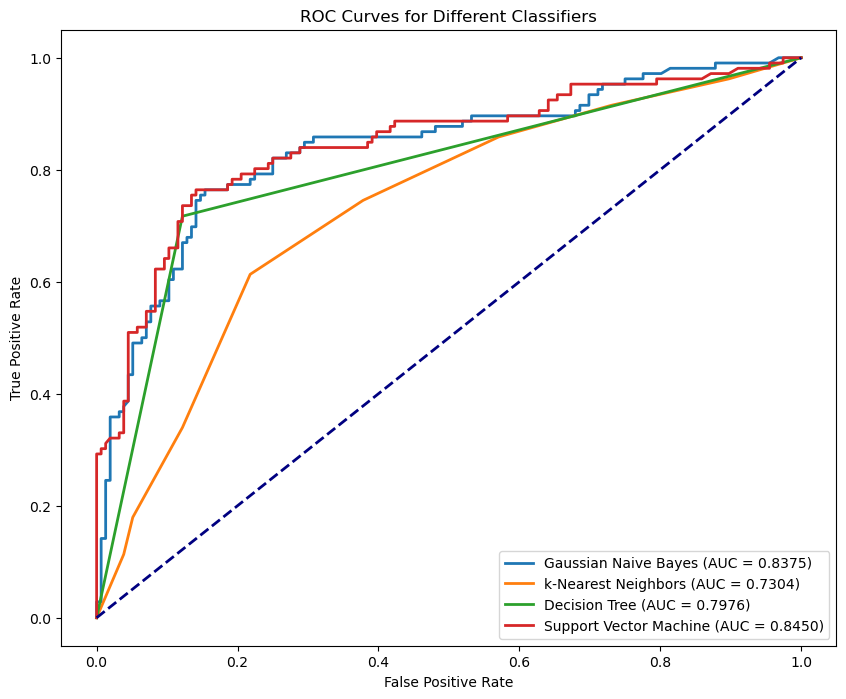

In [15]:
# now let's look at the graph of all models used to classify the data set

plt.figure(figsize=(10, 8))

for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc="lower right")
plt.show()

    The graph above shows 4 models that were used for classification of data from the Titanic dataset.
    
### Analysis of Results



### Analysis of Results

1. AUC:  
Since higher Area Under Curve (AUC) values generally indicate better classifier performance, we can admit that: 
    * Support Vector Machine (SVM) with 0.8450 AUC takes the firsr place, 
    * Gaussian Naive Bayes (NB) with 0.8375 - second place, 
    * Decision Tree (DT) with 0.7976 - third place, 
    * K-Nearest Neighbors (KNN) with 0.7304 - last place.


2. Curve Shape:   
ROC curves that rise more steeply and reach the top-left corner quickly are generally better. Steeper curves indicate better trade-offs between sensitivity and specificity. 
So we can see that SVC and NB are the best according to the criteria, since of lack enough features DT reached top-left corner, but rise less stepply and KNN is so close to diagonal line that means poor classifier performance.

3. Intersection Points:
SVM and NB almost chase each other throughout their path, but at the point approx. [0.1; 0.7] (False Positive Rate; True Positive Rate) DT joins them, which makes this point an important threshold in decision making.   
    The next such decision threshold point can be seen approx. [0.7; 0.9] where DT ND and first KNN are meeted + SVM is not so far away, making it the joint point before the finish line.





### In conclusion:

The Support Vector Machine (SVM) and Gaussian Naive Bayes (NB) classifiers shows superior AUC values, with SVM little outperforming NB.
SVM and NB also showcase steeper ROC curves, emphasizing their better trade-offs between sensitivity and specificity.
Decision Tree (DT) shows a competitive AUC but with a less steep rise in the ROC curve.
K-Nearest Neighbors (KNN) lags behind in both AUC and curve steepness.
